# Matrix Calculation using Numpy

This tutorial will lead you through the matrix calculation techniques we need while manipulate your dataset. We will start with some basic concepts and examples to give you a tast of numpy and follows with the tricks that might help and things we should know while choosing our tool. We will also include banchmark of several commonly used operations to illustrate the power of numpy.

1. [Numpy](#Numpy)
1. [Data Types and Objects](#Data-Types-and-Objects)
1. [Vector](#Vector)
1. [Matrix](#Matrix)
1. [Broadcasting](#Broadcasting)
1. [Universal Function (ufunc)](#ufunc)
1. [Indexing](#Indexing)
1. [Matrix Again](#Matrix-Again)
1. [Some Tricks](#Some-Tricks)

## Numpy
NumPy is the fundamental package for scientific computing with Python. It contains among other things:

+ a powerful N-dimensional array object
+ sophisticated (broadcasting) functions
+ tools for integrating C/C++ and Fortran code
+ useful linear algebra, Fourier transform, and random number capabilities

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.

To follow this tutorial, you will need to install numpy and then import it into this notebook by running the following block.


In [1]:
import numpy as np

## Data Types and Objects
`ndarray` is the super start of numpy and we will use it a lot in scientific computing. A ndarray object is a fixed size N-dimensional array containing data of the same type. There is another type of object we will intrduce you called `matrix` which is a specialized 2-D array that retains its 2-D nature through operations. `ndarray` and `matrix` are slitly different from each other while `ndarray` is the main object we use in this tutorial about matrix calculation but `matrix` has some good features you would like to know. We will cover there difference in all follow sections.

The element-wize data type of a `ndarray` is defined by an attribute object of ndarray called dtype. Usually we can use `dtype` as a parameter when constructing an array or change the data type within an array.

For example,
We can create an array and change its element type as follows
```python
>>> arr = np.ones(5, dtype=bool)
>>> arr
array([ True,  True,  True,  True,  True], dtype=bool)
>>> arr.astype(float)
array([ 1.,  1.,  1.,  1.,  1.])

```

Numpy supports a great variety of numerical data types including bool, int, intc, int8, ..., int64, uint8, ..., uint64, float, ..., float64, etc. And we can also put other data types in an ndarray like datetime64, timedelta64. Strings are special in numpy. All the strings will be convert to a fixed size char-array in numpy to maintain memory consistancy.
```python
>>> np.array(['a', 'bc', 'd'])
array(['a', 'bc', 'd'],
      dtype='|S2')
```

## Vector
There is not a specific vector type in numpy and all we need is an array with `rank = 1`. Usually, we can create a vector in two ways, conversion from other python structure and creating using numpy array object.

In [2]:
# conversion from other sturcture
python_list = [6, 5, 4, 3, 2, 1]
nparr = np.array(python_list)

# numpy object
print np.ones(6)
print np.zeros(6)
print np.empty(6) # this won't initialize the array, values are randomly assigned

[ 1.  1.  1.  1.  1.  1.]
[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.]


And if you check the shape of a vector, you will get a one-element tuple. And the shape stay the same even if you transpose the vector

In [3]:
print nparr.shape
print nparr.T.shape

(6,)
(6,)


Numpy array supports many useful basic vector operations. Arithmetic operators on arrays apply elementwise so a new array will be created and filled with the results.

In [4]:
a = np.array([20,30,40,50])
b = np.arange(4)
print a, b, a-b
print b**2
print a<35
print a*b

[20 30 40 50] [0 1 2 3] [20 29 38 47]
[0 1 4 9]
[ True  True False False]
[  0  30  80 150]


Notice that vector multiplication is also element-wise so if you want to perform dot-multiplication between two vectors you will need to use `np.dot` function

In [5]:
print np.dot(a,b)

260


## Matrix
A matrix in numpy is a ndarray with more than one dimissions. We can create a matrix in the same way as we do with vector.

In [6]:
mat1 = np.array([[1.,2.,3.,4.],[5.,6.,7.,8.],[9,10,11,12]])
mat2 = np.ones((4, 2))
mat2 = mat2 + 2
print np.dot(mat1, mat2)

[[  30.   30.]
 [  78.   78.]
 [ 126.  126.]]


Again, if you use `*` instead of np.dot, the calculation will be elementwise if the dimension match.

In [7]:
try:
    mat1 * mat2 # ValueError will be raised.
except ValueError:
    print 'shape dont match'

shape dont match


## Broadcasting
Numpy applies broadcasting while operating arithmetic operation between two ndarray with different dimension. When doing broadcasting, numpy will firstly line up the dimension of the two arrays and apply broadcasting to each dimission if they satisfy,

1. they are equal, *so the result will be the same*. Or
2. one of them is 1 and *the result will be equal to the bigger dimension*

For example, broadcasting will apply on two matrices with dimissions:
```python
# M1: 3 * 4 * 1
# M2: 1 * 4 * 7
>>> (M1+M2).shape
(3, 4, 7)
```
And of course, broadcasting is much faster than operations between two arrays with same shape.

In [8]:
m1 = np.random.random((30, 40, 70))
m2 = np.ones((30, 40, 70)) * 3

# These result of these two expression are equivalent but the first one is faster 
%timeit m1 + 3
%timeit m1 + m2

10000 loops, best of 3: 46.2 µs per loop
10000 loops, best of 3: 61.4 µs per loop


However, broadcasting is not always faster than operations between two matched array. Here we compare the execution time of broadcasting with different number of matched dimensions.

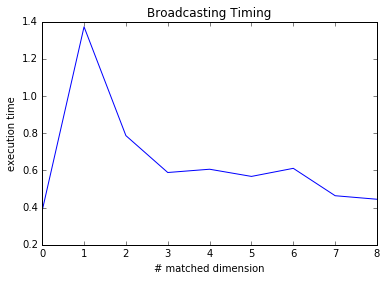

In [9]:
import timeit
%matplotlib inline
import matplotlib.pyplot as plt

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)

global m3
global m4
m3 = np.random.random((4,4,4,4,4,4,4,4))
t = []

# test operation between an array and a number
t.append(timeit.timeit('m3 * 3', "from __main__ import m3", number=10000))

# test broadcasting between two array with different dimission
for d in xrange(8):
    m4 = np.ones([4] * (d+1)) * 3
    # all will result in same sized array
    t.append(timeit.timeit('m3 * m4', "from __main__ import m3, m4", number=10000))

line, = ax.plot(t)

ax.set_title("Broadcasting Timing")
ax.set_xlabel("# matched dimension")
ax.set_ylabel("execution time")

## <a name="ufunc"></a>Universal Function (ufunc)
`ufunc` is a set of functions defined by numpy which operate on ndarray elementwisely. Here are some commonly used functions that might be helpful.

+ logaddexp
+ logaddexp2
+ absolute
+ exp
+ power
+ log
+ log2
+ log10

What's more interesting, all `ufunc`s support broadcasting and all of them can take an extra `out` parameter so that the calculation result will be filled into the out array. And if the out array has a different shape with the operand, broadcasting will apply. 

In [10]:
a = np.arange(5)
b = np.exp(a)
c = np.zeros((3,5))
d = np.exp(a,c)
print 'b.shape', b.shape
print b
print 'c.shape', c.shape
print c
print d

b.shape (5,)
[  1.           2.71828183   7.3890561   20.08553692  54.59815003]
c.shape (3, 5)
[[  1.           2.71828183   7.3890561   20.08553692  54.59815003]
 [  1.           2.71828183   7.3890561   20.08553692  54.59815003]
 [  1.           2.71828183   7.3890561   20.08553692  54.59815003]]
[[  1.           2.71828183   7.3890561   20.08553692  54.59815003]
 [  1.           2.71828183   7.3890561   20.08553692  54.59815003]
 [  1.           2.71828183   7.3890561   20.08553692  54.59815003]]


Besides the `out` parameter, `ufunc` also return the `out` array but it's the same object with out. So if you modify the returned array, `out` array will also be modified.

In [11]:
c[:,0] = 10. # modify c
print d      # d is also modified because they are the same object

[[ 10.           2.71828183   7.3890561   20.08553692  54.59815003]
 [ 10.           2.71828183   7.3890561   20.08553692  54.59815003]
 [ 10.           2.71828183   7.3890561   20.08553692  54.59815003]]


## Indexing


Numpy supports some powerful and useful slicing and indexing operation. We can access array elements in the python way but in a matrix style, which means we can use python accessing and slicing on each demission of a ndarray.

In [12]:
'''
z = 
[[ 0, 10, 20, 30],
 [ 1, 11, 21, 31],
 [ 2, 12, 22, 32],
 [ 3, 13, 23, 33],
 [ 4, 14, 24, 34]]
'''
z = (np.arange(5) + np.arange(4).reshape((4,1)) * 10).T  # recall broadcasting

In [13]:
print 'Indexing by row', z[3]
print 'Indexing by column', z[:,3]
print 'Indexing by row & column', z[3,2]
print 'Slicing by rows'
print z[2:4]
print z[::2]
print z[::-1]
print 'Slicing by columns'
print z[2:4,:]
print 'Slicing by rows & columns'
print z[2:4, 2:4]

Indexing by row [ 3 13 23 33]
Indexing by column [30 31 32 33 34]
Indexing by row & column 23
Slicing by rows
[[ 2 12 22 32]
 [ 3 13 23 33]]
[[ 0 10 20 30]
 [ 2 12 22 32]
 [ 4 14 24 34]]
[[ 4 14 24 34]
 [ 3 13 23 33]
 [ 2 12 22 32]
 [ 1 11 21 31]
 [ 0 10 20 30]]
Slicing by columns
[[ 2 12 22 32]
 [ 3 13 23 33]]
Slicing by rows & columns
[[22 32]
 [23 33]]


### Integer Array Indexing
What if we want to select only some spcific rows (or columns) from a matrix? In numpy, we can use an array of integer as indeces to retrive rows from a matrix.


In [14]:
ids_row = np.array([0,3,4,3,4])
z[ids_row]

array([[ 0, 10, 20, 30],
       [ 3, 13, 23, 33],
       [ 4, 14, 24, 34],
       [ 3, 13, 23, 33],
       [ 4, 14, 24, 34]])

In [15]:
ids_col = np.array([0,2,1,1])
z[:,ids_col]

array([[ 0, 20, 10, 10],
       [ 1, 21, 11, 11],
       [ 2, 22, 12, 12],
       [ 3, 23, 13, 13],
       [ 4, 24, 14, 14]])

But if we want to specify both rows and columns, we need the help of np.ix_() function. np.ix_() returns a tuple of two arrays.
```python
>>> np.ix(ids_row,ids_col)
(array([[0],
        [3],
        [4],
        [3],
        [4]]), array([[0, 2, 1, 1]]))
```

In [16]:
z[np.ix_(ids_row,ids_col)]

array([[ 0, 20, 10, 10],
       [ 3, 23, 13, 13],
       [ 4, 24, 14, 14],
       [ 3, 23, 13, 13],
       [ 4, 24, 14, 14]])

### Boolean Array Indexing

It's also possible to use an array or a matrix of boolean values to access data in a ndarray.

In [17]:
z[np.array([True, False, True, False, True])]

array([[ 0, 10, 20, 30],
       [ 2, 12, 22, 32],
       [ 4, 14, 24, 34]])

Actually, numpy exams each bool value in the index array, and convert it to a integer index if the value is True. So we can use a boolean array which has more values than row number of the matrix only if all the values out of bound are False.

Using a boolean expression to access data is also a useful way. And it actually crreats an boolean array.

In [18]:
z[z>20]

array([30, 21, 31, 22, 32, 23, 33, 24, 34])

In [19]:
z > 20

array([[False, False, False,  True],
       [False, False,  True,  True],
       [False, False,  True,  True],
       [False, False,  True,  True],
       [False, False,  True,  True]], dtype=bool)

## Matrix Again

As we mentioned above, `matrix` is a special type of numpy data structure. A matrix is always 2-Dimensional and * will be matrix multiplication instead of elementwise operator.

In [20]:
m = np.matrix([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
n = np.ones((4,2))
m

matrix([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

In [21]:
m * n

matrix([[ 10.,  10.],
        [ 26.,  26.],
        [ 42.,  42.]])

However, matrix still supports boradcasting when doing addition, subtraction, etc.

In [22]:
m + 1.

matrix([[  2.,   3.,   4.,   5.],
        [  6.,   7.,   8.,   9.],
        [ 10.,  11.,  12.,  13.]])

In [23]:
m + np.ones((1,4))

matrix([[  2.,   3.,   4.,   5.],
        [  6.,   7.,   8.,   9.],
        [ 10.,  11.,  12.,  13.]])

Since it keeps itself in 2 dimensions, it's simpler to do slicing while we want to keep the result as a matrix.

In [24]:
print m[:,2].shape
# while ndarray won't keep its shape
print n[:,1].shape

(3, 1)
(4,)


And it's also conveniente to convert a matrix into a ndarray.

In [25]:
m.A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

## Some Tricks

### Locate elements
Often times we want to construct a matrix with some spcific elements set to be certain values. For example, we can laverage broadcasting to create a sparse matrix with some given elements set to be ones.

In [26]:
# indeces where values are set to be one in each row
index = np.array([2,1,3,0,1])
np.asarray(np.arange(4) == index.reshape(5,1), dtype=int)

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0]])

We can also use a flatier to help us locate the elements.

In [27]:
flat_index = index + np.arange(5) * 4
# array([ 2,  5, 11, 12, 17])

m = np.zeros([5,4])
m.flat[flat_index] = np.ones(5)
m

array([[ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.]])

Or, there is a simpler way to do this using a helper function called `put`

In [28]:
n = np.zeros([5,4])
n.put(flat_index, np.ones(5))
n

array([[ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.]])

### Removing Rows/Columns From a Matrix

Numpy has a strange design that slicing on an array doesn't allocate new memory while indexing create new arrays. So the following two operation are totally different from each other.

In [29]:
a = np.arange(25).reshape([5,5])
b = a[:]
c = a[[0,1,2,3,4]]
print 'b has same values with c:', (b == c).all() # check if every element is same
# Then, if we modify a value in a,
a[0,0] = 1000
print 'b has same values with c:', (b == c).all() # check if every element is same

b has same values with c: True
b has same values with c: False


Therefore, avoid allocating new memory is important when it's not necessory. For example, if we want to delete a row from a matrix, we can simple move the data to a 'right' place, instead of copying to a new space. Suppose we want to remove the second row of matrix a,

In [30]:
a[1:-1] = a[2:]
a = a[:-1]
a

array([[1000,    1,    2,    3,    4],
       [  10,   11,   12,   13,   14],
       [  15,   16,   17,   18,   19],
       [  20,   21,   22,   23,   24]])

### Searching

It's always a good habit to search what you need with numpy. Numpy provides a huge set of functions to support day-to-day science computation. There are functions like `clip` to limit the value of an array within a range, `logaddexp2` to calculate the logarithm of the sum of exponentiations of inputs in base 2, etc. So at most of the time, searching for a function will always suprise you with the beauty of numpy. 